In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
img1 = cv2.imread('dog_backpack.jpg')
img2 = cv2.imread('watermark_no_copy.png')
# img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(600,600))
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

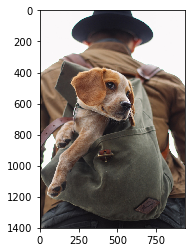

In [41]:
plt.imshow(img1)

In [42]:
img1.shape

(1401, 934, 3)

In [43]:
img2.shape

(600, 600, 3)

In [44]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]

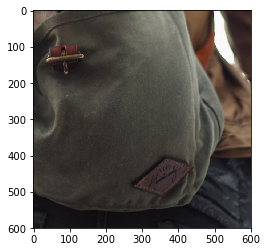

In [45]:
roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[1]]
plt.imshow(roi)

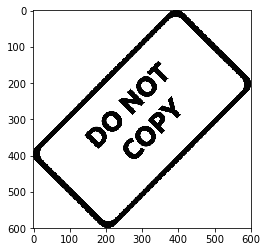

In [46]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,cmap ='gray')

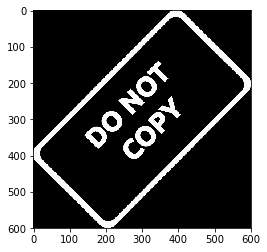

In [49]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray')

In [21]:
whiteBackground = np.full(img2.shape,255,dtype=np.uint8)

In [51]:
# plt.imshow(whiteBackground,cmap='gray')
whiteBackground.shape

(600, 600)

(600, 600)

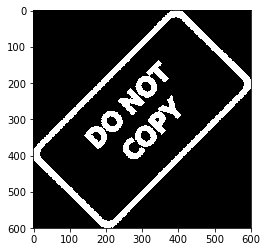

In [53]:
bk = cv2.bitwise_or(whiteBackground,whiteBackground,mask = mask_inv)
plt.imshow(bk,cmap = 'gray')
bk.shape

(600, 600, 3)

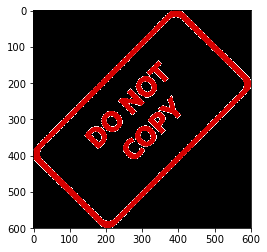

In [54]:
fg = cv2.bitwise_or(img2 , img2 , mask = mask_inv)
plt.imshow(fg)
fg.shape

(600, 600, 3)

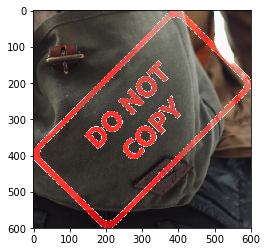

In [57]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)
final_roi.shape

(1401, 934, 3)

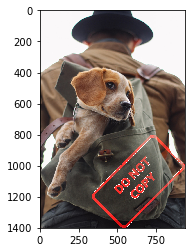

In [58]:
img1[y_offset:img1.shape[0],x_offset:img1.shape[1]] = final_roi
plt.imshow(img1)
img1.shape